# Aim: To predict patient has diabetes or not


## Context:
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
    - 

## Content:
- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## DataSet Details:
   - Pregnancies: Number of times pregnant
   - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   - BloodPressure: Diastolic blood pressure (mm Hg)
   - SkinThickness: Triceps skin fold thickness (mm)
   - Insulin: 2-Hour serum insulin (mu U/ml)
   - BMI: Body mass index (weight in kg/(height in m)^2)
   - DiabetesPedigreeFunction: Diabetes pedigree function
   - Age: Age (years)
   - Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
#Loading the DataSet and importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#checking the shape
df.shape

(768, 9)

- Here,by seeing the dataset we can identify that we have only numerical features(descrete and continous features) and we dont have any categorical features.
- Here, we need to find the realtionship between each and every independent features with our target/dependent feature

## Data Analysis(EDA) 

In [3]:
#finding missing values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- Here, we can see ..we dont have any missing values in the features

In [4]:
#finding numerical features in the dataset
# descrete features
Descrete_Feature=[descrete for descrete in df.columns if len(df[descrete].unique())<25]
print('Number of descrete feature:',len(Descrete_Feature))
print('Descrete Features:',Descrete_Feature)


Number of descrete feature: 2
Descrete Features: ['Pregnancies', 'Outcome']


In [5]:
#checking the number of unique values in each descrete features
df[Descrete_Feature].nunique()

Pregnancies    17
Outcome         2
dtype: int64

- Here,we can see that we have only 2 descrete features in which outcome is our target feature.
- Since, Outcome has only 2 different features so it is clearly visible that it is a classfication problem.But before going forward we need to check that our dataset is balanced or not.

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

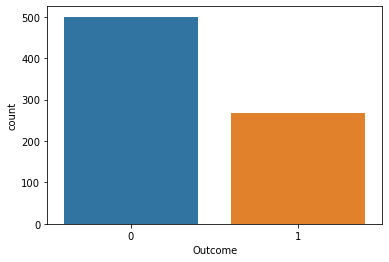

In [7]:
sns.countplot(df['Outcome'])

- Here, its clearly visible that our target column more number of 0 compare to 1.We can consider that our dataset is not imblanced because both dont have much difference.

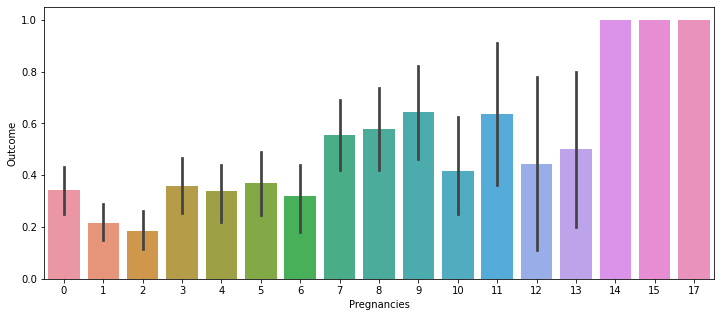

In [8]:
#Checking the relationship between descrete feature and target feature
plt.figure(figsize=(12,5))
sns.barplot(x=df['Pregnancies'],y=df['Outcome'])

- Here,by seeing this graph we are not able to find much information.

In [9]:
#checking continuous features in the dataset
Continuous_Feature=[continous for continous in df.columns if continous not in Descrete_Feature]
print('Number of contnious feature:',len(Continuous_Feature))
print('Continuous Feature:',Continuous_Feature)


Number of contnious feature: 7
Continuous Feature: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


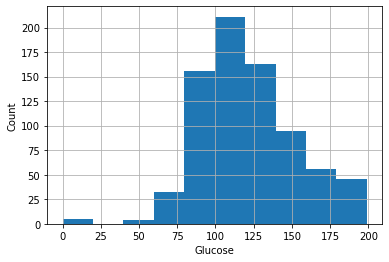

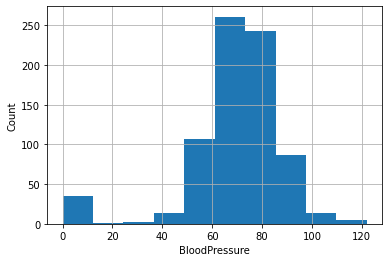

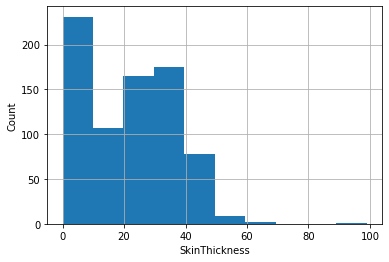

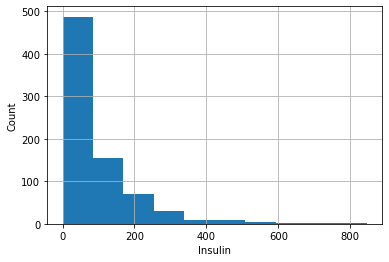

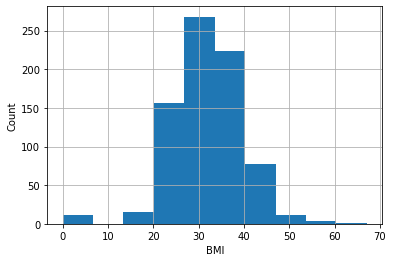

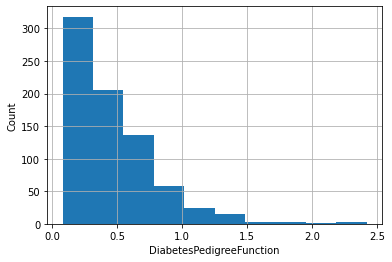

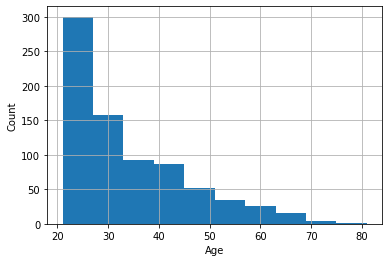

In [10]:
#checking the relationship between continuous feature and target feature
for continous in Continuous_Feature:
    data=df.copy()
    data[continous].hist(bins=10)
    plt.xlabel(continous)
    plt.ylabel('Count')
    plt.show()

- Here, we can see we have some skewed data in the feature.So, we can normalize/transform the datas into normalized data by using logarathmic distribution

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


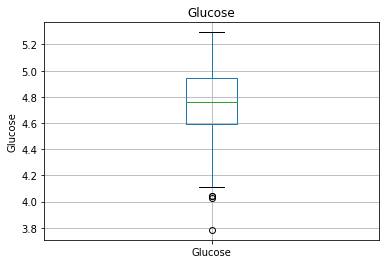

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


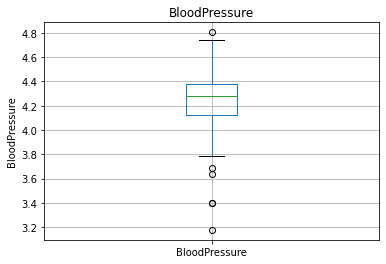

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


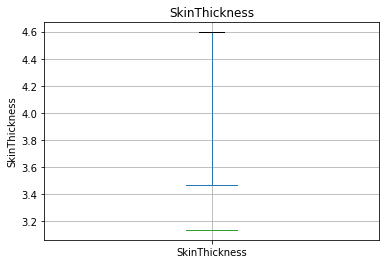

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


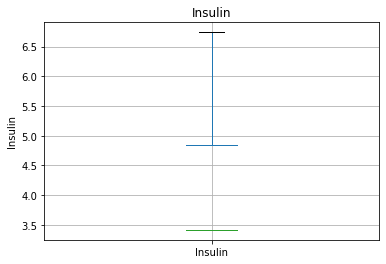

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


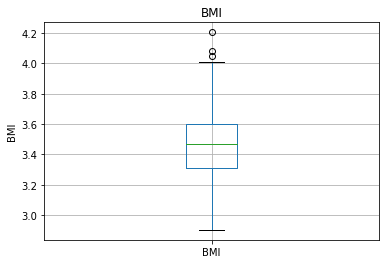

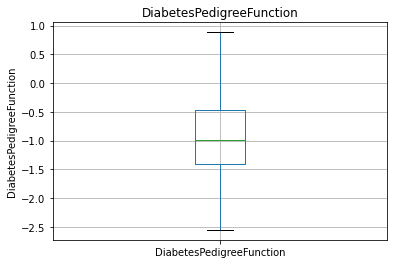

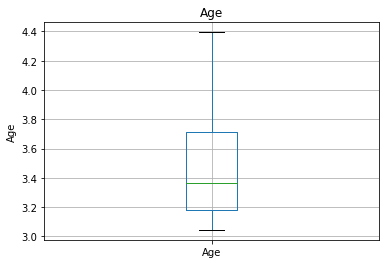

In [11]:
#checking the outliers
for feature in Continuous_Feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

- Here, we can see we have so many outliers in our dataset.But since we dont have much knowledge about the domain we can choose 
  the algorithms which is not sensitive towards the outliers Or we can perform feature scaling to scale down the dataset,even 
  the data has different types measurment units.There is a chance that those outliers are important for the dataset also. 

## Feature Engineering

- Since, we know outliers effect for those algorithms which calculate lengths for calculations like logistic Regression,Support Vector Machine,K Nearest Neighbour etc.So, we choosed the tree based algorithms for the model creation. 
- We,dont have any missing values ..we dont need to handle it and to handle the outliers we choose tree based algorithm

In [12]:
#Splitting the dataset into independent and dependent features
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x1=df[features]
y1=df['Outcome']

## Feature Selection

In [13]:
#Applying ExtraTreeClassifier to choose best features
from sklearn.ensemble import ExtraTreesClassifier
feature=ExtraTreesClassifier()
feature.fit(x1,y1)

ExtraTreesClassifier()

In [14]:
feature.feature_importances_

array([0.10901397, 0.23545605, 0.09972071, 0.08132823, 0.07319072,
       0.1399545 , 0.11793928, 0.14339653])

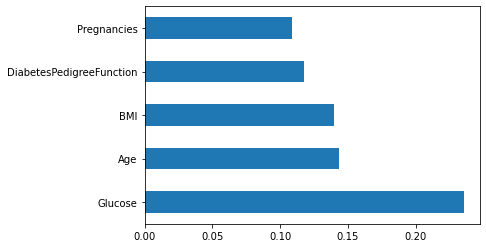

In [15]:
Best=pd.Series(feature.feature_importances_,index=x1.columns)
Best.nlargest(5).plot.barh()
plt.show()

- Here, We can see our 5 best features are Glucose,BMI,Age,DiabetesPedigreeFunction,Pregnancies

In [16]:
#splitting the data set in dependent and independent features with 5 best features
features=['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age']
x=df[features]
y=df['Outcome']

In [17]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Model Creation

### Performing Hyperparameter Tuning

The main parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.

In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [19]:
from sklearn.ensemble import RandomForestClassifier
ran_forest=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=ran_forest,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [20]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'entropy'}

In [21]:
rf=RandomForestClassifier(n_estimators=1600,min_samples_split=14,min_samples_leaf=8,max_features='auto',
                          max_depth=670,criterion='gini')
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=670, min_samples_leaf=8, min_samples_split=14,
                       n_estimators=1600)

In [22]:
pred=rf.predict(x_test)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [23]:
#Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
cnf=confusion_matrix(y_test,pred)
cnf

array([[97, 10],
       [19, 28]], dtype=int64)

In [24]:
print('Accuracy:',accuracy_score(y_test,pred)*100)

Accuracy: 81.16883116883116


### Observations:
   - RandomForestClassifier without Hyperparameter Tuning giving the accuracy of 81.16 %
   - RandomForestClassifier after using Hyperparameter Tuning giving the accuracy of 80.52 %
   - Since, we have less number data ...so our model performance is pretty good and when we increase the number of data, our model will start giving better performance.

In [25]:
import pickle
file=open('Diabetes.pkl','wb')
pickle.dump(rf,file)